In [2]:
def process_record (record):
    #count=0
    new_record= {'Strain':[],'genotype':[],'subtype':[],'Version':[],'country':[],'governate':[],'gene':[]}
    gene_of_interest=['NS5B','NS5A protein ','NS5B protein ','nonstructural protein 5B F','NS5b','non-structural protein 5B','NS5B RNA dependent RNA polymerase','nonstructural protein 5b','NSB5 protein','nonstructural protein 5A','NS3 protein','NS5A','NS3 protease','RNA-dependent RNA polymerase','NS3','nonstructural protein 5','NS5','NS5a','NS3 protease/helicase','NS5B RNA-dependent RNA polymerase']
    temp=''
    gov=[]

    for i in record:
        i=i.lstrip()
        if i.startswith('VERSION'):
            new_record['Version'].append(i[12:])

        elif i.startswith('/country='):
            lin=i[10:-1]
            lin=lin.split(':')
            new_record['country'].append(lin[0])
            if len(lin)>1:
                temp=lin[-1].split()
                for t in temp:
                    if 'governorate' in temp:
                        temp.remove('governorate')
                        gov.append(temp)
                    elif 'Governorate'in temp:
                        temp.remove('Governorate')
                        gov.append(temp)
            for g in gov:
                if len(g)>1:
                    new_record['governate'].append(str(g[-1]))
                else:
                    new_record['governate'].append(str(g[0]))

        elif i.startswith('/strain='):
            new_record['Strain'].append(i[9:-1])
        
        elif i.startswith('/product='):
            temp=i[10:-1]
            if temp in gene_of_interest:
                new_record['gene'].append(temp)
        elif i.startswith('/gene='):
            temp=i[7:-1]
            if temp in gene_of_interest:
                new_record['gene'].append(temp)
        elif i.startswith('/note='):
            if 'subtype' in i:
                f=i.split()
                new_record['subtype'].append(f[1])
            else:
                x=i.find('gen')
                if x>0:
                    i=i[x:-1]
                    y=i.split(':')
                    new_record['genotype'].append(y[-1])
    return  new_record;

In [3]:
dataSource=['EgyptNotEgyptian.gb','EgyptianNotEgypt.gb']
record = []
for x in dataSource:
    filh=open(x)
    for line in filh:
        line=line.lstrip()
        line=line.rstrip()
        if (not line.startswith('//')):
#             print(line)
            record.append(line)
        else:
            result=process_record(record)
            continue

In [4]:
#print(result)

In [5]:
d = dict()
for c in result['gene']:
    if c not in d:
        d[c] = 1 
    else:
        d[c] = d[c] + 1
print(d)


{'NS5B': 205, 'NS5b': 78, 'non-structural protein 5B': 2, 'NS5B RNA dependent RNA polymerase': 3, 'nonstructural protein 5b': 130, 'NSB5 protein': 48, 'nonstructural protein 5A': 3, 'NS3 protein': 12, 'NS5A': 1, 'NS3 protease': 1, 'RNA-dependent RNA polymerase': 3, 'NS3': 3, 'NS5a': 1, 'NS5': 6, 'nonstructural protein 5': 3, 'NS3 protease/helicase': 2, 'NS5B RNA-dependent RNA polymerase': 2}


In [6]:
import pandas as pd

In [7]:
from matplotlib import pyplot as plt

In [8]:
plt.rcParams['figure.figsize']=[15,6]

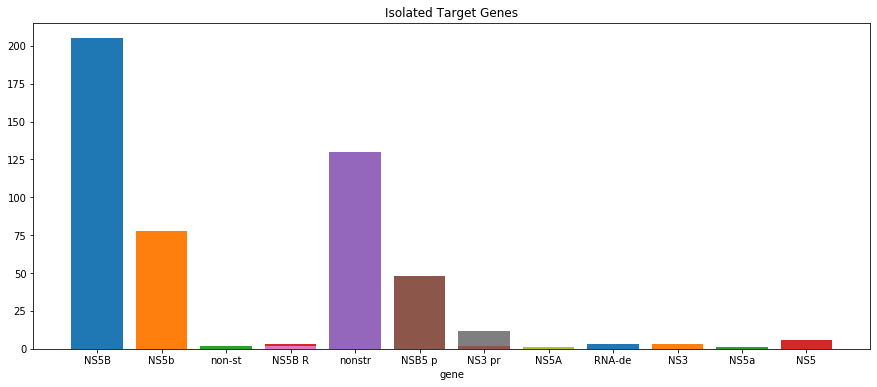

In [9]:
for key in d:
    x =key[0:6] 
    y =d[key]
    plt.bar(x, y)
    plt.title("Isolated Target Genes")
    plt.xlabel("gene")
plt.show()

In [10]:
con = dict()
for z in result['country']:
    if z not in con:
        con[z] = 1 
    else:
        con[z] = con[z] + 1
print(con)
#print(result['country'])

{'Egypt': 1341, 'Japan': 1, 'Belgium': 2, 'Canada': 1, 'Netherlands': 51}


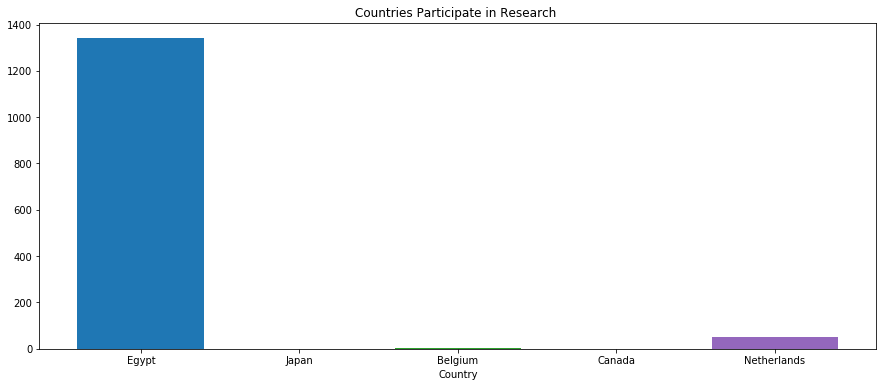

In [20]:
for key in con:
    x =key 
    y =con[key]
    plt.bar(x, y)
    plt.title("Countries Participate in Research ")
    plt.xlabel("Country")
plt.show()

In [12]:
genotype = dict()
for z in result['genotype']:
    if z not in genotype:
        genotype[z] = 1 
    else:
        genotype[z] = genotype[z] + 1
print(genotype)

{' 4o': 11, ' 4a': 279, ' 4m': 5, '1g': 12, '4a': 62, '4m': 3, '4 beta': 6, '4l': 4, '1a': 2, '1b': 1, '4 alpha': 5, ' 4': 79, ' 4u': 46, ' 1g': 9, ' 1b': 3, ' 1a': 1, ' 4n': 2, ' 4d': 1, ' 4A': 1}


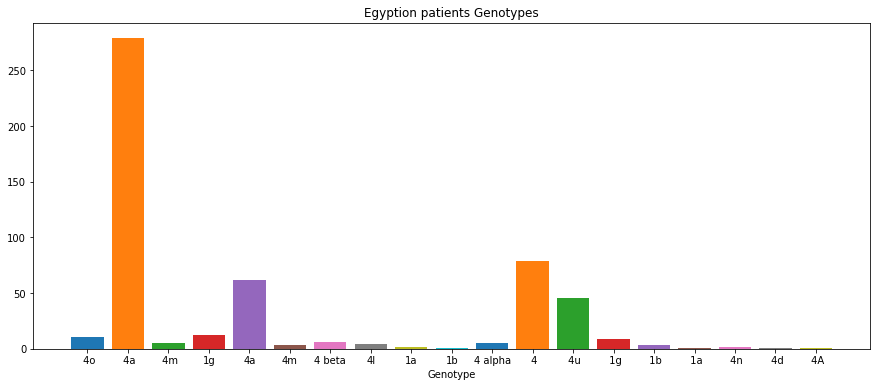

In [13]:
for key in genotype:
    x =key 
    y =genotype[key]
    plt.bar(x, y)
    plt.title("Egyption patients Genotypes")
    plt.xlabel("Genotype")
plt.show()

In [14]:
strain=dict()
for s in result['Strain']:
    if s not in  strain:
        strain[s] = 1 
    else:
        strain[s] = strain[s] + 1
print(strain)

{'Central_76': 1, 'Central_0430': 1, 'North_A5': 1, 'South_1657': 1, 'East_c19': 1, 'East_Ac5': 1, 'North_A6': 1, 'Central_44': 1, 'South_1555': 1, 'East_c18': 1, 'East_Ac3': 1, 'Central_37': 1, 'South_1356': 1, 'South_1406': 1, 'South_1570': 1, 'East_c10': 1, 'East_Ac8': 1, 'Central_49': 1, 'Central_41': 1, 'East_Ac6': 1, 'North_42': 1, 'East_c15': 1, 'South_1676': 1, 'North_0426': 1, 'North_A4': 1, 'North_43': 1, 'North_0432': 1, 'Central_111': 1, 'NorthWest_A21': 1, 'East_c14': 1, 'Central_74': 1, 'South_1617': 1, 'South_1512': 1, 'East_c13': 1, 'ED43': 1, 'OW': 28, '010': 1, '023': 1, '061': 1, '051': 1, '016': 1, '006': 1, '047': 1, '029': 1, '173': 1, '102': 1, '182': 1, '046': 1, '060': 1, '180': 1, '040': 1, '055': 1, '013': 1, '136': 1, '184': 1, '139': 1, '043': 1, '134': 1, '045': 1, '032': 1, '137': 1, '111': 1, '190': 1, '189': 1, '132': 1, '168': 1, '094': 1, '056': 1, '193': 1, '073': 1, '105': 1, '085': 1, '087': 1, '163': 1, '035': 1, '155': 1, '127': 1, '131': 1, '059

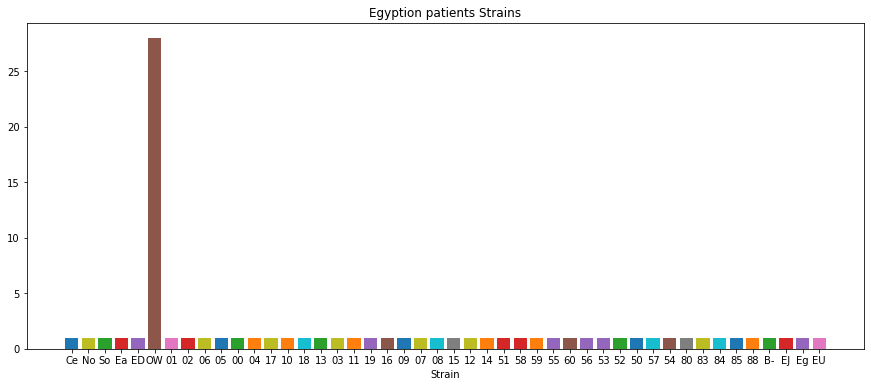

In [22]:
for key in strain:
    x =key[0:2] 
    y =strain[key]
    plt.bar(x, y)
    plt.title("Egyption patients Strains")
    plt.xlabel("Strain")
plt.show()

In [16]:
Gov=dict()
for s in result['governate']:
    if s not in  Gov:
        Gov[s] = 1 
    else:
        Gov[s] = Gov[s] + 1
print(Gov)

{'Dakahliya': 4531, 'Sheikh': 12499, 'Luxor': 13323, 'Kalyobiya': 6857, 'Monofiya': 9063, 'Hughada': 8958, 'Matrouh': 3423, 'Cairo': 10083, 'Suef': 5515, 'Suez': 6646, 'Alexandria': 5685, 'Dakahlya': 3309, 'Minya': 5534, 'Beheira': 5545, 'Assiut': 6549, 'Menofia': 117260}


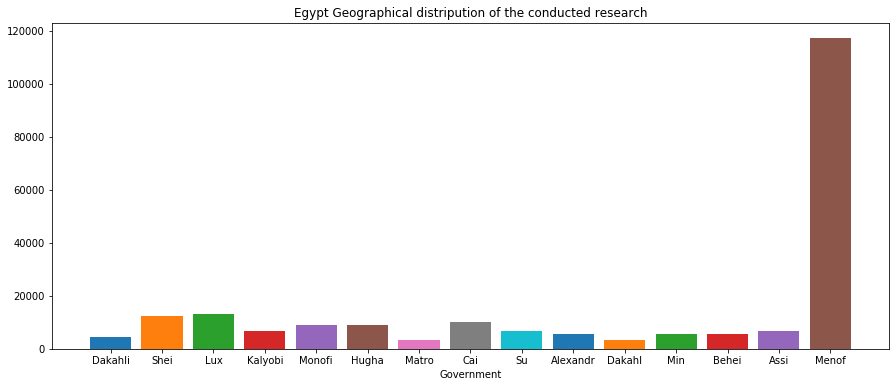

In [17]:
for key in Gov:
    x =key[:-2] 
    y =Gov[key]
    plt.bar(x, y)
    plt.title("Egypt Geographical distripution of the conducted research")
    plt.xlabel("Government")
plt.show()

In [18]:
# Test for Any duplicated records
Version=dict()
for v in result['Version']:
    if v not in  Version:
        Version[v] = 1 
    else:
        Version[v] = Version[v] + 1
print(Version)

{'AB103424.1': 1, 'AB103425.1': 1, 'AB103426.1': 1, 'AB103427.1': 1, 'AB103428.1': 1, 'AB103429.1': 1, 'AB103430.1': 1, 'AB103431.1': 1, 'AB103432.1': 1, 'AB103433.1': 1, 'AB103434.1': 1, 'AB103435.1': 1, 'AB103436.1': 1, 'AB103437.1': 1, 'AB103438.1': 1, 'AB103439.1': 1, 'AB103440.1': 1, 'AB103441.1': 1, 'AB103442.1': 1, 'AB103443.1': 1, 'AB103444.1': 1, 'AB103445.1': 1, 'AB103446.1': 1, 'AB103447.1': 1, 'AB103448.1': 1, 'AB103449.1': 1, 'AB103450.1': 1, 'AB103451.1': 1, 'AB103452.1': 1, 'AB103453.1': 1, 'AB103454.1': 1, 'AB103455.1': 1, 'AB103456.1': 1, 'AB103457.1': 1, 'AB469847.1': 1, 'AB470005.1': 1, 'AB470006.1': 1, 'AB470007.1': 1, 'AB470008.1': 1, 'AB470009.1': 1, 'AB470010.1': 1, 'AB470011.1': 1, 'AB470012.1': 1, 'AB470013.1': 1, 'AB470014.1': 1, 'AB470015.1': 1, 'AB470016.1': 1, 'AB470017.1': 1, 'AB470018.1': 1, 'AB470019.1': 1, 'AB470020.1': 1, 'AB470021.1': 1, 'AB470022.1': 1, 'AB470023.1': 1, 'AB470024.1': 1, 'AB470025.1': 1, 'AB470026.1': 1, 'AB470027.1': 1, 'AB470028.1':

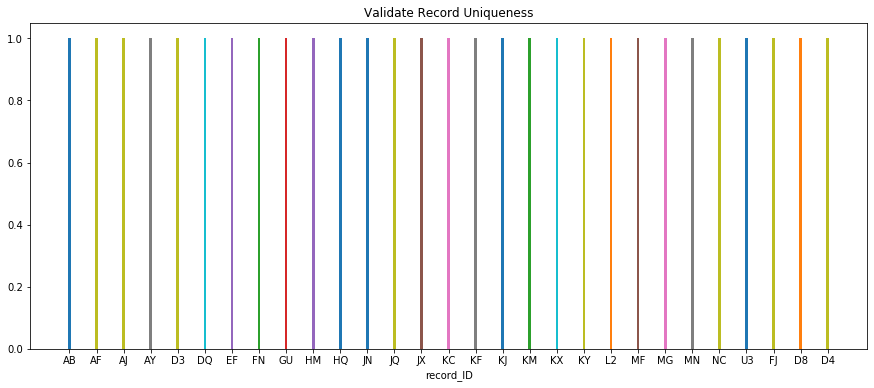

In [19]:
for key in Version:
    x =key[0:2] 
    y =Version[key]
    plt.bar(x, y,0.1)
    plt.title("Validate Record Uniqueness")
    plt.xlabel("record_ID")
plt.show()